<a href="https://colab.research.google.com/github/arima35/Belajar-Machine-Learning-untuk-Pemula/blob/main/Rev2/%5BClustering%5D_Submission_Akhir_BMLP_Arief_Indra_Kusuma_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [26]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [27]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [28]:
#Type your code here
# Memuat dataset
dataset_path = 'https://raw.githubusercontent.com/arima35/Belajar-Machine-Learning-untuk-Pemula/main/Rev2/Customers.csv'  # Ubah sesuai dengan lokasi file Anda
df = pd.read_csv(dataset_path)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())
df.tail()

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [29]:
#Type your code here
df.shape

(2000, 8)

In [30]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [31]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [32]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%     

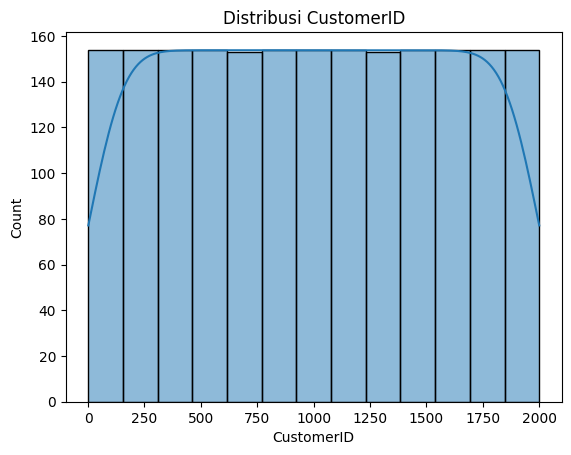

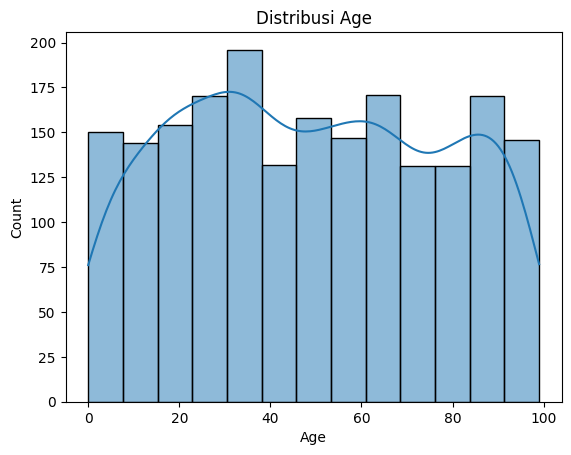

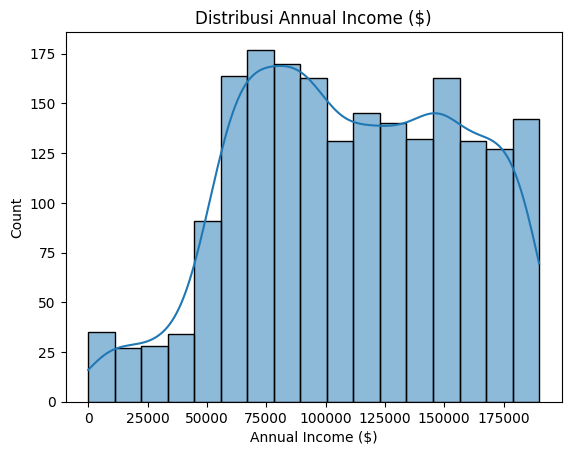

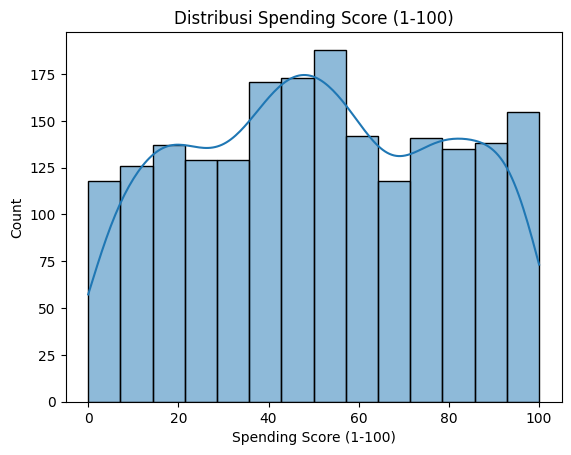

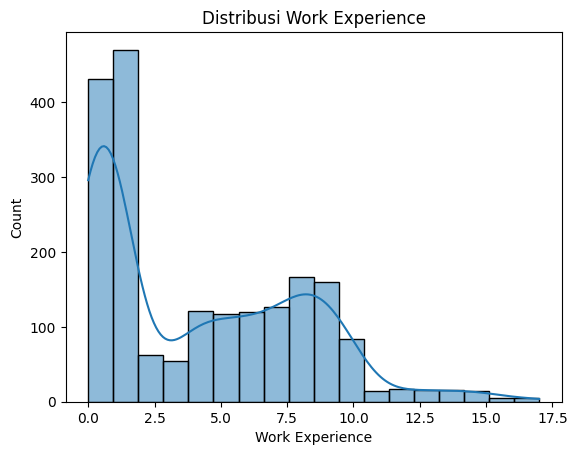

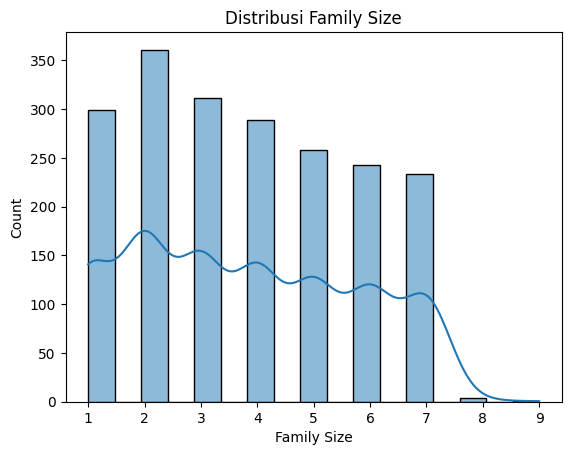

In [33]:
# Visualisasi distribusi data numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

#Update
menambahkan augmentasi data untuk memperbanyak dataset

In [34]:
# Augmentasi data
augmented_data = df.copy()

# Lakukan augmentasi hanya pada kolom tertentu
if 'Age' in augmented_data.columns:
    augmented_data['Age'] = augmented_data['Age'] + np.random.randint(-5, 5, size=len(augmented_data))

# Tambahkan ID unik jika ada kolom 'ID'
if 'ID' in augmented_data.columns:
    augmented_data['ID'] = augmented_data['ID'] + len(df)

# Gabungkan dataset lama dengan augmentasi
df = pd.concat([df, augmented_data], ignore_index=True)

# Mengatur jumlah output dataset
desired_rows = 2501  # Bisa diganti jumlah yang di inginkan
if len(df) >= desired_rows:
    # Sampling jika data terlalu banyak
    df = df.sample(n=desired_rows, random_state=42)
else:
    # Augmentasi tambahan jika data kurang
    additional_data = pd.concat([df] * ((desired_rows // len(df)) + 1), ignore_index=True)
    df = additional_data.sample(n=desired_rows, random_state=42)

# Dataset lama sekarang telah diperbarui
print(f"\nDataset akhir setelah augmentasi dengan total {len(df)} baris.")


Dataset akhir setelah augmentasi dengan total 2501 baris.


In [35]:
# Reset index setelah mengatur jumlah baris
df = df.reset_index(drop=True)
print(df.head())
print(df.tail())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0         556    Male   89              57033                      99   
1        1492  Female   32              96207                      67   
2         528    Male   97             112783                      21   
3        1926  Female   -3             105935                      46   
4         990  Female   12             109759                      96   

  Profession  Work Experience  Family Size  
0     Artist                0            4  
1     Artist                5            5  
2     Artist                9            6  
3     Doctor                4            5  
4     Artist                9            3  
      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
2496          98  Female   27              67000                      50   
2497        1334  Female   97             133614                      58   
2498        1165  Female   16             136747               

In [36]:
# Mengisi missing values untuk kolom numerik dengan mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Mengisi missing values untuk kolom kategorikal dengan modus
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0])

df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,556,Male,89,57033,99,Artist,0,4
1,1492,Female,32,96207,67,Artist,5,5
2,528,Male,97,112783,21,Artist,9,6
3,1926,Female,-3,105935,46,Doctor,4,5
4,990,Female,12,109759,96,Artist,9,3


In [37]:
# Encoding kolom kategorikal
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [38]:
# Pisahkan kolom numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Encoding hanya untuk kolom kategorikal
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [39]:
print("\nData setelah preprocessing:")
print(df.head())
print(df.tail())


Data setelah preprocessing:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0         556       1   89              57033                      99   
1        1492       0   32              96207                      67   
2         528       1   97             112783                      21   
3        1926       0   -3             105935                      46   
4         990       0   12             109759                      96   

   Profession  Work Experience  Family Size  
0           0                0            4  
1           0                5            5  
2           0                9            6  
3           1                4            5  
4           0                9            3  
      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
2496          98       0   27              67000                      50   
2497        1334       0   97             133614                      58   
2498        1165       0   1

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [40]:
#Type your code here
print(f"\nJumlah dataset yang akan dilakukan modeling sekitar {len(df)} baris.")


Jumlah dataset yang akan dilakukan modeling sekitar 2501 baris.


In [41]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

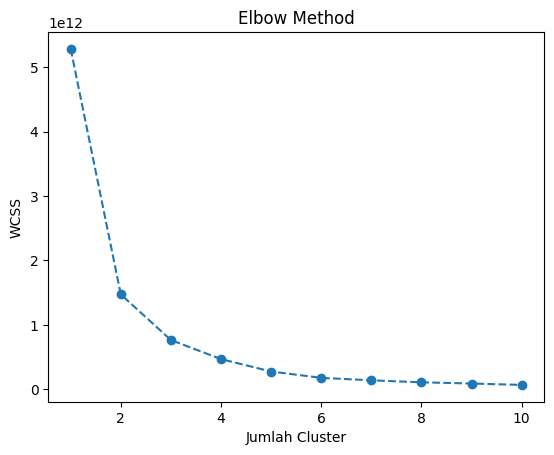

In [42]:
# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [43]:
# Menggunakan Silhouette Score untuk evaluasi
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

In [44]:
# Menentukan jumlah cluster terbaik (misalnya, dari silhouette score maksimal)
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [45]:

# Membuat model K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [46]:
#Type your code here
# Hitung Silhouette Score untuk model
silhouette_avg = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Silhouette Score untuk model dengan {optimal_clusters} cluster: {silhouette_avg:.4f}")

Silhouette Score untuk model dengan 2 cluster: 0.6161


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [47]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [48]:
#Type your code here
# Menggunakan PCA untuk mereduksi dimensi data menjadi 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numerical_columns])

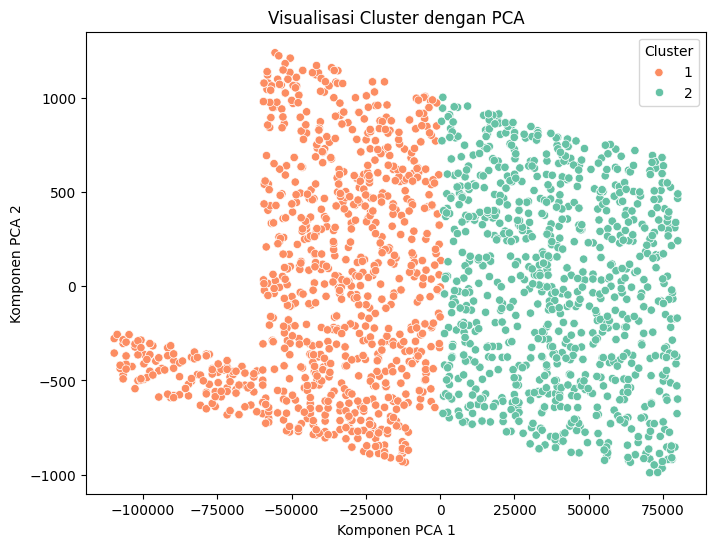

In [49]:
# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster', labels=[str(i) for i in range(1, optimal_clusters + 1)])  # Set legend label dari 1
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [50]:
#Type your code here
# Melihat karakteristik setiap cluster
print("\nKarakteristik setiap cluster:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.describe())


Karakteristik setiap cluster:

Cluster 0:
        CustomerID       Gender          Age  Annual Income ($)  \
count  1236.000000  1236.000000  1236.000000        1236.000000   
mean   1150.598706     0.389968    49.363269      149216.753236   
std     500.555229     0.487940    29.599402       22977.687606   
min     274.000000     0.000000    -5.000000      110195.000000   
25%     699.750000     0.000000    23.000000      129956.750000   
50%    1167.000000     0.000000    50.000000      148539.000000   
75%    1580.250000     1.000000    76.000000      169299.000000   
max    2000.000000     1.000000   103.000000      189709.000000   

       Spending Score (1-100)   Profession  Work Experience  Family Size  \
count             1236.000000  1236.000000      1236.000000  1236.000000   
mean                51.297735     3.057443         4.415858     3.994337   
std                 27.751069     2.689750         4.035495     1.983936   
min                  1.000000     0.000000       

In [51]:
# Melihat karakteristik setiap cluster dan membuat keterangan
print("\nKarakteristik setiap cluster:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    # Menampilkan statistik deskriptif
    cluster_description = cluster_data.describe().T  # Transpose agar lebih mudah dibaca
    print(cluster_description)

    # Keterangan berdasarkan statistik
    print("\nKeterangan Cluster:")
    for col in cluster_description.index:
        mean_value = cluster_description.loc[col, 'mean']
        std_value = cluster_description.loc[col, 'std']
        min_value = cluster_description.loc[col, 'min']
        max_value = cluster_description.loc[col, 'max']

        print(f"- {col}: Rata-rata = {mean_value:.2f}, Standar Deviasi = {std_value:.2f}, Min = {min_value}, Max = {max_value}")

    print("\n" + "-"*40)



Karakteristik setiap cluster:

Cluster 0:
                         count           mean           std       min  \
CustomerID              1236.0    1150.598706    500.555229     274.0   
Gender                  1236.0       0.389968      0.487940       0.0   
Age                     1236.0      49.363269     29.599402      -5.0   
Annual Income ($)       1236.0  149216.753236  22977.687606  110195.0   
Spending Score (1-100)  1236.0      51.297735     27.751069       1.0   
Profession              1236.0       3.057443      2.689750       0.0   
Work Experience         1236.0       4.415858      4.035495       0.0   
Family Size             1236.0       3.994337      1.983936       1.0   
Cluster                 1236.0       0.000000      0.000000       0.0   

                              25%       50%        75%       max  
CustomerID                 699.75    1167.0    1580.25    2000.0  
Gender                       0.00       0.0       1.00       1.0  
Age                      

Berikut Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan kondisi kesehatan:
---
**Cluster 0**:
- Profil Demografis: Usia rata-rata adalah 49 tahun.

- Kondisi Ekonomi: Pendapatan tahunan rata-rata sebesar $149.216, menunjukkan kelompok ini cenderung memiliki status ekonomi tinggi.

- Perilaku Konsumen: Spending score rata-rata sebesar 51, mengindikasikan pola pengeluaran yang seimbang.

- Faktor Lain: Rata-rata memiliki pengalaman kerja 4 tahun dan ukuran keluarga sekitar 4 anggota.

---
**Cluster 1**:
- Profil Demografis: Usia rata-rata adalah 47 tahun.

- Kondisi Ekonomi: Pendapatan tahunan rata-rata sebesar $71.142, lebih rendah dibanding cluster 0, menunjukkan status ekonomi menengah.

- Perilaku Konsumen: Spending score rata-rata 50, menunjukkan pola pengeluaran yang stabil.

- Faktor Lain: Rata-rata pengalaman kerja 3 tahun dengan ukuran keluarga 3-4 anggota.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [55]:
print(f"\nJumlah dataset akhir sebanyak {len(df)} baris.")


Jumlah dataset akhir sebanyak 2501 baris.


In [56]:
# Menyimpan hasil clustering ke CSV
df.to_csv('hasil_clustering_rev2.csv', index=False)
print("\nHasil clustering telah disimpan sebagai 'hasil_clustering_rev2.csv'.")


Hasil clustering telah disimpan sebagai 'hasil_clustering_rev2.csv'.
